In [1]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,  classification_report, silhouette_score
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import fowlkes_mallows_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_tree

import lightgbm as lgb

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Create Dataframe from CSV file
df = pd.read_csv('data/transaction_dataset.csv')
df = df.copy()

In [3]:
# Shuffle rows
df = df.sample(frac=1, random_state=42).reset_index()
df

,index,Unnamed: 0,Index,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,...,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,7763,7763,102,0x0ae775637e63fa95855246fd82e96802d05883fc,1,1641.74,2103.12,327679.35,10,148,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,,Genaro X
1,8655,8655,994,0x731dcf009e769453336b53380af55985da6d1127,1,2811.51,837.98,9812.92,2,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,,Blockwell say NOTSAFU
2,106,106,107,0x011bed5908623f6adfcd54872ed88e0dc713a1bf,0,157.32,0.00,314.65,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,439,439,440,0x09f3f4f3362ffdb13e19c7d7f73f0b7d48856224,0,20.17,3.92,68.37,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,2420,2420,2421,0x3f38c2ebd999386f7d6d3fefd741b5ee0733c310,0,4.38,24303.06,243074.38,10,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9836,5734,5734,2802,0x98db189554a651ae225b91496ec6c58be45ed64a,0,0.00,16197.17,226760.43,0,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,None,OmiseGO
9837,5191,5191,2259,0x89a788089cd0d98755123126baef7577a2355427,0,0.00,0.00,15369.12,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,None,Livepeer Token
9838,5390,5390,2458,0x8f51d6c3672f0e09fbbafa2ad6ddbdf66ac9972f,0,0.00,0.00,1.77,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
9839,860,860,861,0x151f9b0c0d9e4aaedc17feb6d698f96c5e9c75ef,0,165.15,0.00,330.30,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [4]:
df.columns

Index(['index', 'Unnamed: 0', 'Index', 'Address', 'FLAG',
       'Avg min between sent tnx', 'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx',

In [5]:
# Drop unwanted columns/ drop las 2 columns (might try later with dummies function)
df = df.drop(columns=['Unnamed: 0','Index','index',' ERC20 most sent token type',
      ' ERC20_most_rec_token_type','Address'])



In [6]:
# Drop row with NaN values
df = df.dropna()

In [7]:
#df = df.fillna(0)  #67

In [8]:
#df = df.interpolate() #40

<AxesSubplot: >

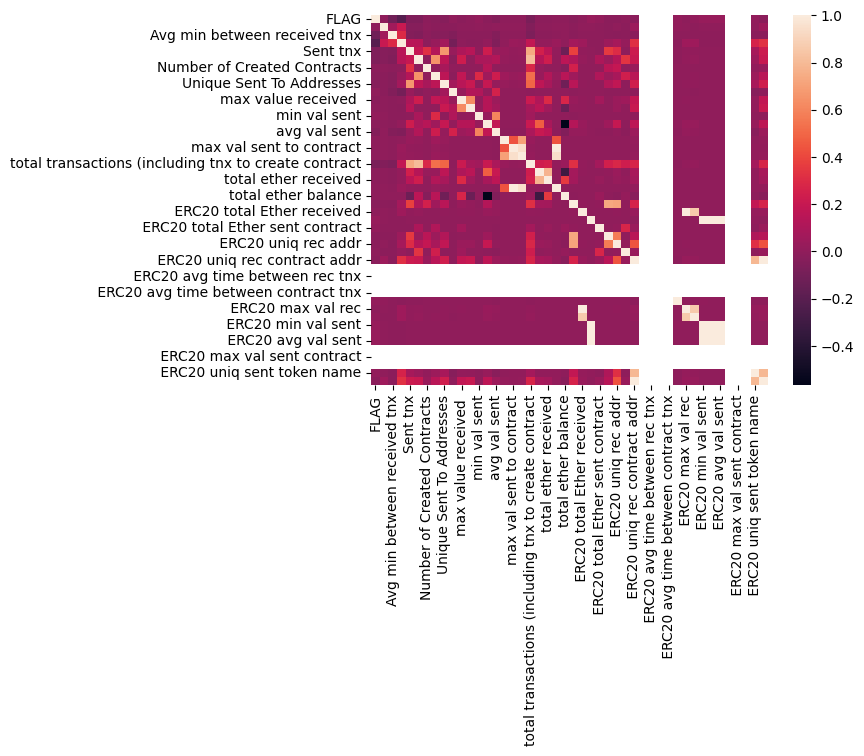

In [9]:
df_corr = df.corr()
sns.heatmap(df_corr)

In [10]:
df_corr

,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,...,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name
FLAG,1.000000,-0.003852,-0.115186,-0.212408,-0.063147,-0.062347,-0.011414,-0.021151,-0.035667,-0.002193,...,-4.313011e-03,0.007881,0.025364,0.025038,0.025044,NaN,NaN,NaN,0.009249,-0.018047
Avg min between sent tnx,-0.003852,1.000000,0.061503,0.209385,-0.034985,-0.038622,-0.006626,-0.017336,-0.019345,-0.020183,...,-2.455932e-03,-0.003149,-0.001687,-0.002020,-0.001965,NaN,NaN,NaN,0.000529,0.047202
Avg min between received tnx,-0.115186,0.061503,1.000000,0.295530,-0.043307,-0.056741,-0.008943,-0.031232,-0.027535,-0.048496,...,-3.544424e-03,-0.005606,-0.003758,-0.003780,-0.003727,NaN,NaN,NaN,-0.019896,-0.014966
Time Diff between first and last (Mins),-0.212408,0.209385,0.295530,1.000000,0.149388,0.142487,-0.005307,0.033111,0.067437,-0.094770,...,4.651212e-02,0.049020,-0.006852,-0.006268,-0.006802,NaN,NaN,NaN,0.263939,0.324288
Sent tnx,-0.063147,-0.034985,-0.043307,0.149388,1.000000,0.196747,0.320602,0.129078,0.669681,0.022715,...,4.291143e-03,0.008843,-0.001557,-0.001019,-0.001415,NaN,NaN,NaN,0.079728,0.220614
Received Tnx,-0.062347,-0.038622,-0.056741,0.142487,0.196747,1.000000,-0.004224,0.648478,0.163060,-0.025009,...,1.537920e-02,0.019126,-0.001899,-0.000744,-0.000918,NaN,NaN,NaN,0.042681,0.202747
Number of Created Contracts,-0.011414,-0.006626,-0.008943,-0.005307,0.320602,-0.004224,1.000000,-0.002408,0.084418,-0.001829,...,9.202945e-04,0.002052,-0.000092,0.000149,-0.000070,NaN,NaN,NaN,0.006033,0.030089
Unique Received From Addresses,-0.021151,-0.017336,-0.031232,0.033111,0.129078,0.648478,-0.002408,1.000000,0.159226,-0.013997,...,1.603025e-03,0.003592,-0.001044,-0.000261,-0.000546,NaN,NaN,NaN,0.040674,0.148851
Unique Sent To Addresses,-0.035667,-0.019345,-0.027535,0.067437,0.669681,0.163060,0.084418,0.159226,1.000000,0.070054,...,3.598439e-03,0.005246,-0.000967,-0.000439,-0.000827,NaN,NaN,NaN,0.084897,0.237520
min value received,-0.002193,-0.020183,-0.048496,-0.094770,0.022715,-0.025009,-0.001829,-0.013997,0.070054,1.000000,...,-1.670077e-03,-0.002852,-0.001498,-0.001529,-0.001477,NaN,NaN,NaN,-0.028810,-0.002695


In [11]:
df = df.drop(columns=[' ERC20 avg time between rec tnx',' ERC20 avg time between contract tnx',' ERC20 max val sent contract',' ERC20 min val sent contract',' ERC20 avg time between rec 2 tnx',' ERC20 avg val sent contract',' ERC20 avg time between sent tnx'])

<AxesSubplot: >

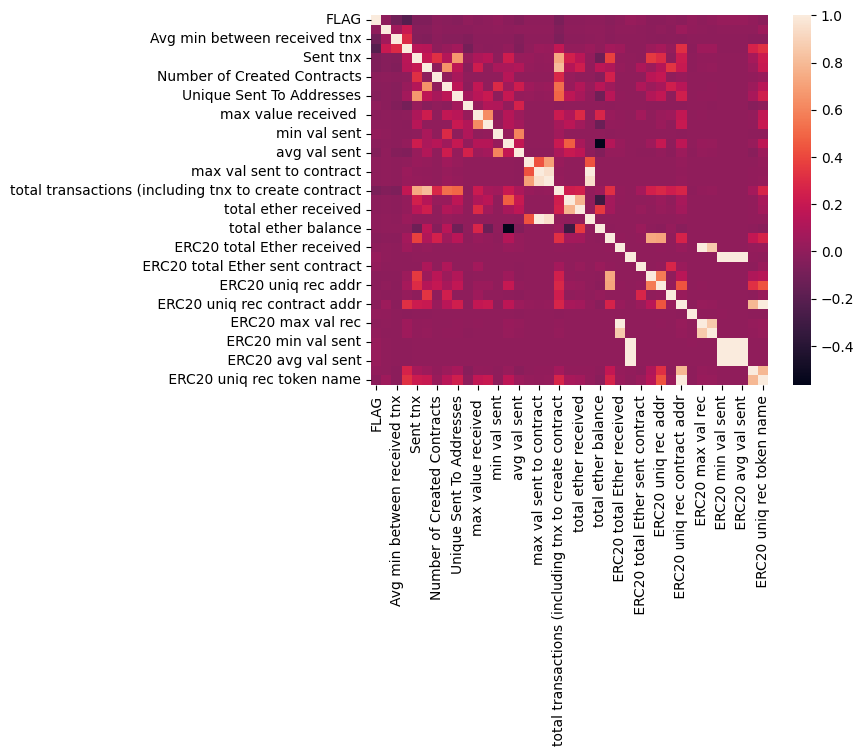

In [12]:
df_corr = df.corr()
sns.heatmap(df_corr)

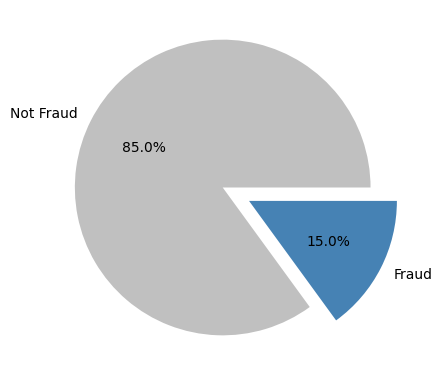

In [13]:
labels = ['Not Fraud','Fraud']
explode = (0.1,0.1)
colors = ['silver', 'steelblue']

plt.pie(df["FLAG"].value_counts(), labels=labels, autopct='%1.1f%%', colors=colors, explode=explode)
plt.show()

In [14]:
X= df.drop(columns=['FLAG'])
y = df['FLAG']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print(f'Shape of training data before SMOTE: {X_train.shape}')
print(f'Shape of training data after SMOTE: {X_train_resampled.shape}')

Shape of training data before SMOTE: (6308, 38)
Shape of training data after SMOTE: (10724, 38)


Logistic regression a linear model. I might not get the best results for prediction.

Accuracy of logistic regression classifier on test set: 0.88
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      2300
           1       0.97      0.22      0.35       404

    accuracy                           0.88      2704
   macro avg       0.92      0.61      0.64      2704
weighted avg       0.89      0.88      0.85      2704



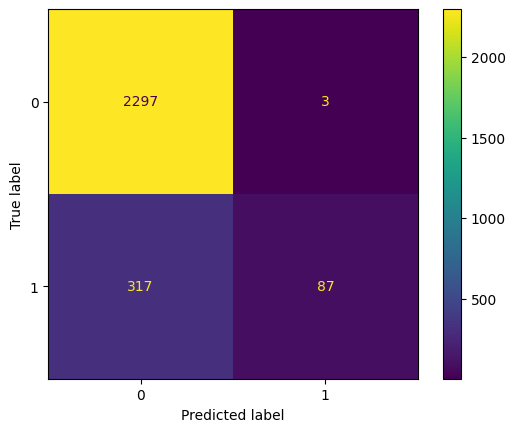

In [16]:
logreg = LogisticRegression()
logreg.fit(X_train_resampled, y_train_resampled)

predictions = logreg.predict(X_test) #Predict on the test not train!
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

cm = confusion_matrix(y_test, predictions, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=logreg.classes_)

print(classification_report(y_test,predictions))
disp.plot()
plt.show()

The LGBMClassifier is a gradient boosting algorithm that is based on decision trees.
It isn't as fast and scalable as Logistic regression but should give a better accuracy. It is a model designed to handle large complex datasets.

Accuracy of LGBM classifier on test set: 0.99
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      2300
           1       0.95      0.95      0.95       404

    accuracy                           0.99      2704
   macro avg       0.97      0.97      0.97      2704
weighted avg       0.99      0.99      0.99      2704



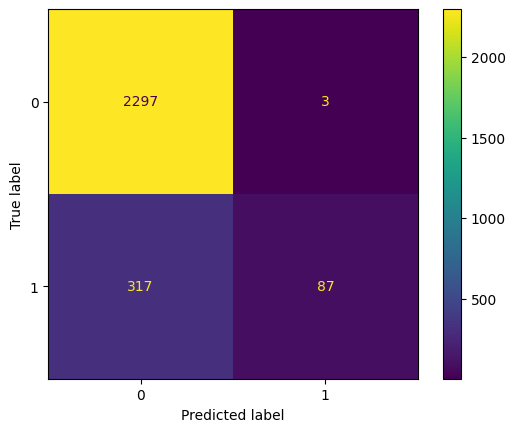

[[2297    3]
 [ 317   87]]


In [17]:
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train_resampled, y_train_resampled)

y_pred = lgbm.predict(X_test)
print('Accuracy of LGBM classifier on test set: {:.2f}'.format(lgbm.score(X_test, y_test))) #Percentage
print('Classification Report:\n', classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, predictions, labels=lgbm.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=lgbm.classes_)


disp.plot()
plt.show()

print(cm)


XGBoost is an effective algorithm for finding anomalies for a few reasons:

-XGBoost can simulate non-linear relationships. It is crucial for spotting abnormal records within a database that may be hidden to linear models.

-It is based on a dicision tree called 'CART' (classification and regression tree)

-It also uses regularisation techniques to avoid overfitting to focus on the important patterns.

-It is an ensmeble algorithm that combines the predictions of multiple individual models.

Accuracy of logistic XGB classifier on test set: 0.98
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2300
           1       0.96      0.94      0.95       404

    accuracy                           0.98      2704
   macro avg       0.97      0.97      0.97      2704
weighted avg       0.98      0.98      0.98      2704



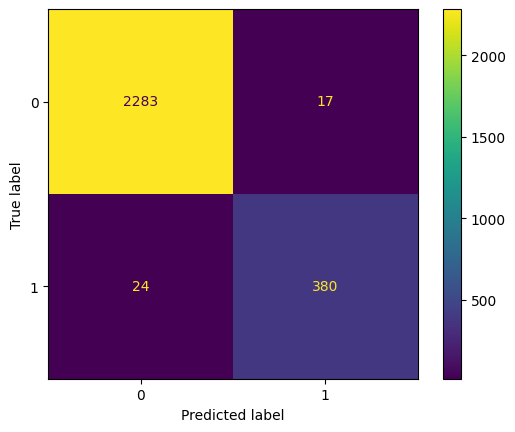

[[2283   17]
 [  24  380]]


In [18]:

model = xgb.XGBClassifier()
model.fit(X_train_resampled, y_train_resampled)

y_pred = model.predict(X_test)
print('Accuracy of logistic XGB classifier on test set: {:.2f}'.format(model.score(X_test, y_test))) #Percentage
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

disp.plot()
plt.show()
print(cm)

Due to the fact that there are 2 classifications, the model appears to be functioning well. The model appears to be providing reliable predictions for both classes based on the high number of true negatives (2283), and true positives (380). The model appears to be making few errors in either direction based on the low number of false positives (17) and false negatives (24) in the data. Let's see ig i can do better by changing hyperparameters.

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'learning_rate': [0.01, 0.1, 0.5],
    'gamma': [0, 0.1, 0.5, 1],
    'subsample': [0.5, 0.8, 1],
    'colsample_bytree': [0.5, 0.8, 1]
}

xgb_model = XGBClassifier(random_state=42)


grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_resampled, y_train_resampled)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

disp.plot()
plt.show()

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2300
           1       0.94      0.95      0.95       404

    accuracy                           0.98      2704
   macro avg       0.97      0.97      0.97      2704
weighted avg       0.98      0.98      0.98      2704



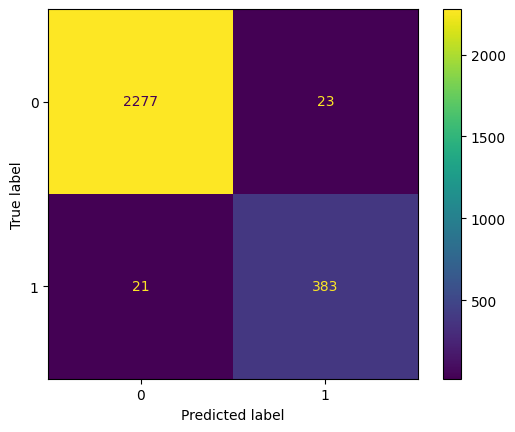

[[2277   23]
 [  21  383]]


In [19]:
#these are the best parameters
param =  {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.5, 'max_depth': 20, 'n_estimators': 200, 'subsample': 0.7}

xgb_model = XGBClassifier(**param,random_state=42)

xgb_model.fit(X_train_resampled, y_train_resampled)

y_pred =xgb_model.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)

disp.plot()
plt.show()

cm = confusion_matrix(y_test, y_pred)
print(cm)

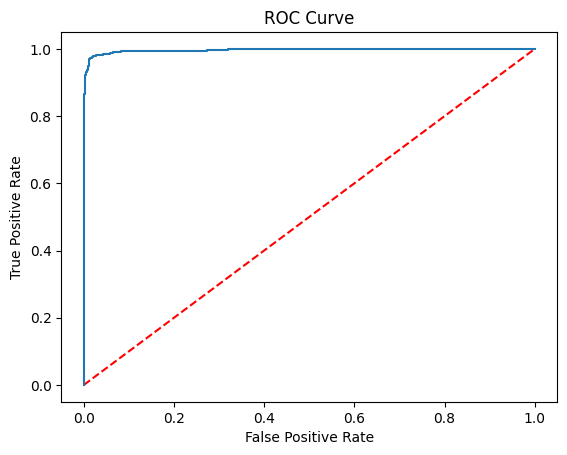

AUC Score: 0.996


In [20]:
from sklearn.metrics import roc_curve, roc_auc_score


y_prob = xgb_model.predict_proba(X_test)

y_prob = y_prob[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.plot([0,1], [0,1], 'r--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


auc_score = roc_auc_score(y_test, y_prob)
print(f"AUC Score: {auc_score:.3f}")


Tradeoff between the true positive rate (TPR) and the false positive rate (FPR) for different threshold values. As we can see the classification model is good.

In [ ]:
train_preds = xgb_model.predict(X_train_resampled)

# Create a new model in Keras using the predicted labels as input
model = Sequential([
    Dense(units=38, input_dim=X_train_resampled.shape[1], activation='relu'),
    Dense(units=19, activation='relu'),
    Dropout(0.5),
    Dense(units=9, activation='relu'),
    Dropout(0.5),
    Dense(units=19, activation='relu'),
    Dropout(0.5),
    Dense(units=1, activation='sigmoid')
])

# Compile the model using Adam optimizer and binary crossentropy loss function
model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model using the predicted labels from XGBoost
model.fit(train_preds, y_train_resampled, epochs=50, batch_size=32, validation_data=(test_preds, y_test))

# Evaluate the final model on the test set
loss, accuracy = model.evaluate(test_preds, y_test)
print("Accuracy:", accuracy)
